# Analysis of Economic Data and Research done by John Taylor and Justin Wolfers
## This analysis was done to uncover biases and errors made by economists, John Taylor and Justin Wolfers in their analyses of the relationship between unemployment and government spening.
### By Cathy Robison, Logan Guerry, Freddy Zhang, Meg O'Connell

In [1]:
#Data can be found on github repo
unemp <- read.csv('UNRATE.csv',header = T)
gdp <- read.csv('GDP.csv', header = T)
spend <- read.csv('GCE.csv',header = T)


In [11]:
colnames(spend) = c('DATE',"SPENT")

#loading in color brewer
library(plyr)
library(RColorBrewer)
taylor_col <- brewer.pal(n=11, 'Spectral')

#joining data sets together
ug<-join(gdp,unemp,
         type = 'inner')
ugs<-join(ug,spend, 
          type = 'inner')
nrow(ugs)
head(ugs,5)

#Formatting the date column so it is uniform and we can manipulate it later
ugs$DATE <- strptime(as.character(ugs$DATE), "%m/%d/%Y")
ugs$DATE <-  format(as.Date(ugs$DATE), "%Y-%m-%d")

#Creating a new column to look at government spending as a percentage of GDP
ugs$SpGDP <- ugs$SPENT/ugs$GDP*100

#Getting the dates (Q1 1990 - Q3 2010) John Taylor used to look at the relationship between government spending as 
#a precentage of GDP and unemployment
taylor <- ugs[ugs$DATE >= as.Date('1990-01-01', format ="%Y-%m-%d") & ugs$DATE <= as.Date('2010-07-01', format ="%Y-%m-%d"),]
complementary <- ugs[ugs$DATE < as.Date('1990-01-01', format ="%Y-%m-%d") | ugs$DATE > as.Date('2010-07-01', format ="%Y-%m-%d"),]
head(taylor,5)
length(taylor$UNRATE)
length(taylor$SpGDP)
labs<- seq(16.0,25.0, by = .5)

Joining by: DATE


DATE,GDP,UNRATE
1/1/1948,265.742,3.4
4/1/1948,272.567,3.9
7/1/1948,279.196,3.6
10/1/1948,280.366,3.7
1/1/1949,275.034,4.3


Joining by: DATE


[1] 282

DATE,GDP,UNRATE,SPENT
1/1/1948,265.742,3.4,40.875
4/1/1948,272.567,3.9,42.884
7/1/1948,279.196,3.6,44.660
10/1/1948,280.366,3.7,46.603
1/1/1949,275.034,4.3,48.585


,DATE,GDP,UNRATE,SPENT,SpGDP
169,1990-01-01,5872.701,5.4,1212.450,20.64553
170,1990-04-01,5960.028,5.4,1230.721,20.64958
171,1990-07-01,6015.116,5.5,1242.584,20.65769
172,1990-10-01,6004.733,5.9,1268.467,21.12445
173,1991-01-01,6035.178,6.4,1284.187,21.27836


[1] 83

[1] 83

numeric(0)

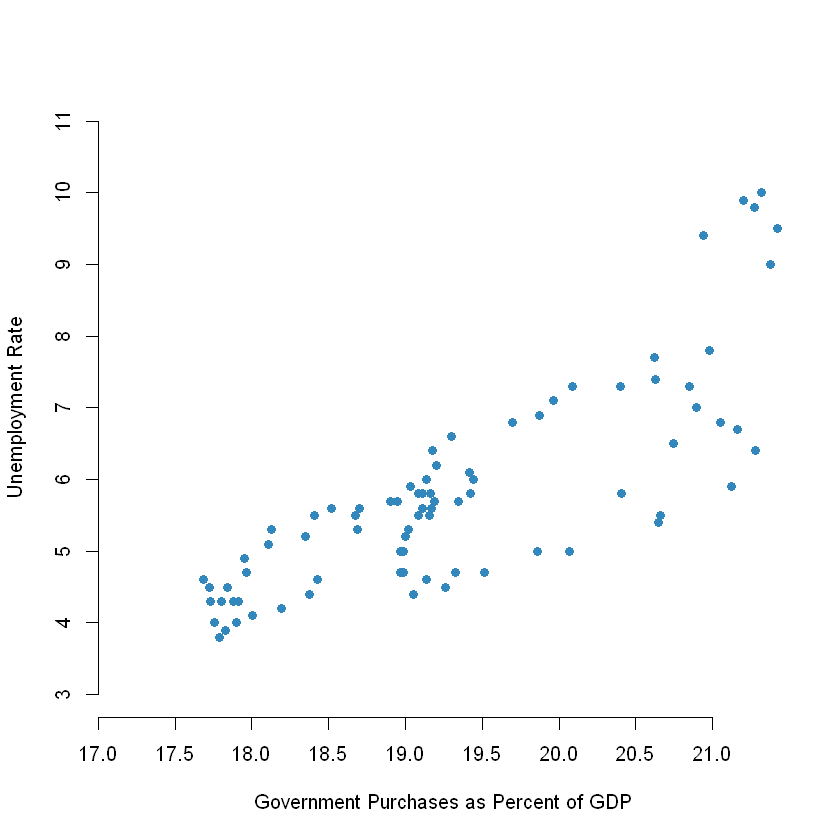

In [3]:
#The recreation of John Taylor's plot
plot(taylor$SpGDP, taylor$UNRATE, xaxt = 'n', xaxs = 'i', xlim = c(17,21.5), ylim = c(3,11),axes=F,
     xlab = 'Government Purchases as Percent of GDP', ylab = 'Unemployment Rate', col = taylor_col[10], pch = 16)+
  axis(1, at = seq(16.0,21.0, by = .5))+
  axis(2, at = seq(3,11, by =1))


ERROR: Error in plot(taylor$SpGDP, taylor$UNRATE, xaxt = "n", xaxs = "i", xlim = c(17, : non-numeric argument to binary operator


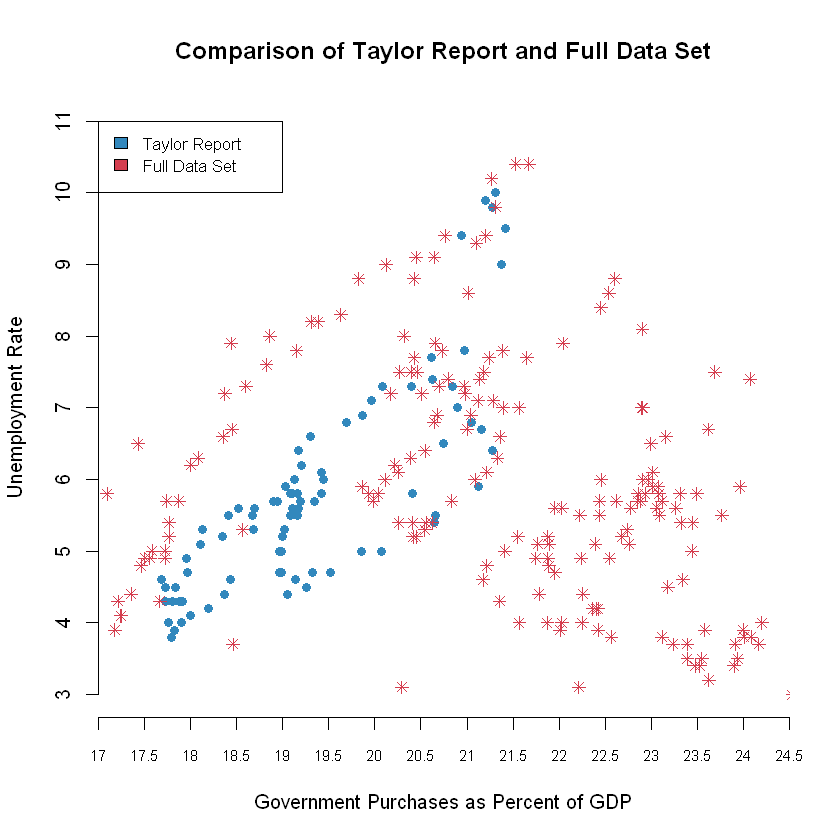

In [4]:
#This looking at John Taylor's plot (Q1 1990 - Q3 2010) and the entire data set. 
plot(taylor$SpGDP, taylor$UNRATE, xaxt = 'n', xaxs = 'i', xlim = c(17,24.5), ylim = c(3,11),axes=F,
     main = 'Comparison of Taylor Report and Full Data Set',
     xlab = 'Government Purchases as Percent of GDP', ylab = 'Unemployment Rate', col = taylor_col[10], pch = 16)+
  points(complementary$SpGDP, complementary$UNRATE, xaxt = 'n', xaxs = 'i', xlim = c(17,24.5), ylim = c(3,11),
       xlab = 'Government Purchases as Percent of GDP', ylab = 'Unemployment Rate', col = taylor_col[2], pch = 8)+
  axis(1, at = seq(16.0,25.0, by = .5), labels = labs,cex.axis=.75)+
  axis(2, at = seq(3,11, by =1))+
  legend(x = c(17, 19), y = c(10, 11), legend = c("Taylor Report", "Full Data Set"), fill = c(taylor_col[10], taylor_col[2]), col = c(taylor_col[10], taylor_col[2]), cex = .85)


plot(ugs$SpGDP, ugs$UNRATE, xaxt = 'n', xaxs = 'i', xlim = c(17,21.5), ylim = c(3,11),
     axes=F, main = 'From "1948-01-01" to "2018-04-01"',
     xlab = 'Government Purchases as Percent of GDP', ylab = 'Unemployment Rate', col = taylor_col[2], pch = 16)+
  axis(1, at = seq(16.0,21.0, by = .5), labels = labs,cex.axis=.75)+
  axis(2, at = seq(3,11, by =1))

#Taylor represents the data as having a positive relationship but when looking the entire dataset it appears there is no
#relationship 

QY,decadeCor
1948,-0.3378537
1948,-0.3607989
1948,-0.3126263
1948,-0.2992365
1949,-0.3086264
1949,-0.3155819


numeric(0)

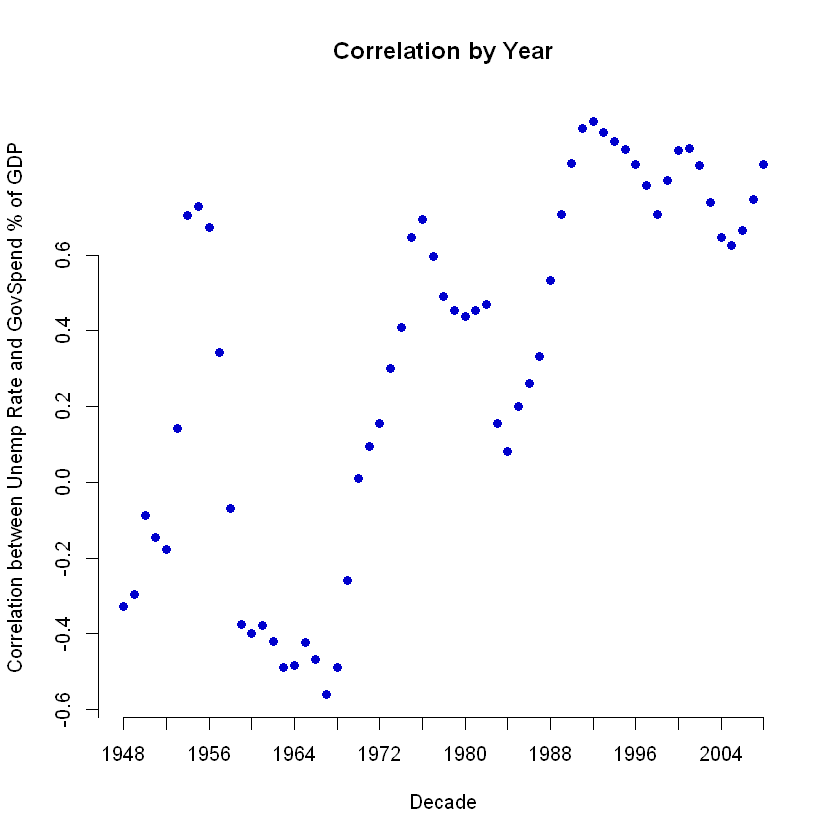

In [5]:
#Examinig the correlation that Taylor presents in his scatter plot. Analysis of correlation done by quarter and decade.  
decadeCor <- vector(mode = 'numeric', length = 242)
QY <- rep(seq(from = 1948, to = 2018, by = 1), each = 4) 
QY <- QY[1:242]
for (i in 1:length(decadeCor)){
  decadeCor[i] <- cor(ugs$SpGDP[i:(39 +i)], ugs$UNRATE[i:(39+i)])
}

df <- data.frame(QY,decadeCor)
head(df)

#Finding the mean correlation by quarter
meanCorYear<-aggregate(decadeCor ~ QY, FUN=mean, data=df)

plot(meanCorYear$QY, meanCorYear$decadeCor,main = 'Correlation by Year', 
     ylab = 'Correlation between Unemp Rate and GovSpend % of GDP', xlab = 'Decade', col = 'blue3', pch=16, axes=F)+
    axis(1, at = seq(1948, 2008, by = 4))+
    axis(2, at = seq(-1.0, 0.6, by = 0.2))

#the correlation between government spending as a percentage of GDP and the national unemployment rate, 
#though rather volatile before the 1990’s, is rather cyclical since that time. Although significant spikes in 
#correlation are evident in the graph, such as the one in the mid-1950’s, these spikes typically only last for 
#roughly five years before returning to a level much closer to that at the start of the decade in question.



ERROR: Error in plot(CherryPicked, col = "red", ylim = c(-0.5, 0.6), pch = 2) + : non-numeric argument to binary operator


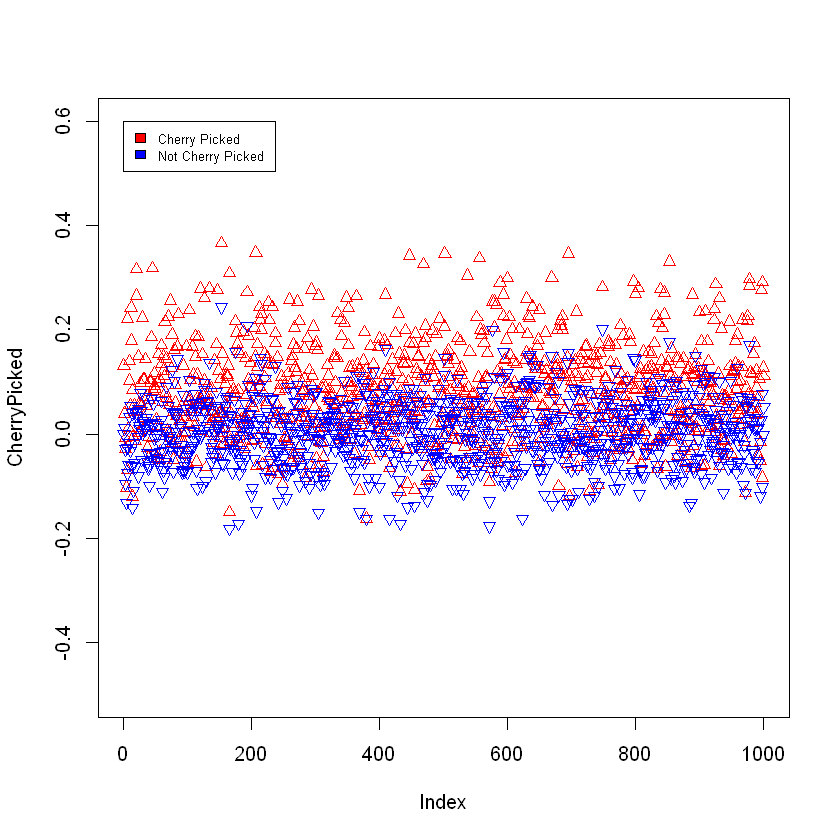

In [14]:
#simulating the process of “cherry picking” in Wolfers’terminology, and to evaluate the seriousness of this part of the criticism
CherryPicked = c()
NotCherryPicked = c()
for (ii in 1:1000) {
  x=rnorm(256)
  y=rnorm(256)
  index = 1
  output = c()
  for (i in 60:256) {
    output[index] <- cor(tail(x,i), tail(y,i))
    index = index + 1 
  }
  CherryPicked[ii] = max(output) # lowest correlation
  NotCherryPicked[ii] = tail(output,1) # last one means the correlation over the entire sample 
}

# visual of the cherry picked data
library('scales')
plot(CherryPicked, col = 'red', ylim = c(-0.5, 0.6),  pch = 2)+
points(NotCherryPicked, col = 'blue', ylim = c(-0.5, 0.6),  pch = 6)+
legend(0,0.6, legend = c("Cherry Picked", "Not Cherry Picked"), fill = c('red', 'blue'), col = c('red', 'blue'), cex = .65)

#By looking at the plot below we can see that the cherry picked data has a hgiher correlation than the non cherry picked data

In [7]:
# numerical evidence
t.test(CherryPicked, NotCherryPicked)

# A paired t-test is used to compare two population means where you have two samples in which observations 
# in one sample can be paired with observations in the other sample.
t.test(CherryPicked, NotCherryPicked, paired=TRUE)

# Based on the result, at 95% confidence level, there is significant difference (p-value < 2.2e-16) of the two means. 
# Here we should reject the null hypothesis that the two means are equal because the p-value is less than 0.05. 
# The maximum difference of the mean can be as low as -0.08700986 and as high as -0.07861949(result may be different).
# Overall, Cherry Picked Correlation is lower than Not Cherry Picked Correlation.



	Welch Two Sample t-test

data:  CherryPicked and NotCherryPicked
t = 23.513, df = 1742.6, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.07741906 0.09151031
sample estimates:
 mean of x  mean of y 
0.08562770 0.00116301 



	Paired t-test

data:  CherryPicked and NotCherryPicked
t = 39.89, df = 999, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.08030958 0.08861980
sample estimates:
mean of the differences 
             0.08446469 


ERROR: Error in hist(NotCherryPicked, add = T, col = alpha("blue", 0.3)) + legend("topright", : non-numeric argument to binary operator


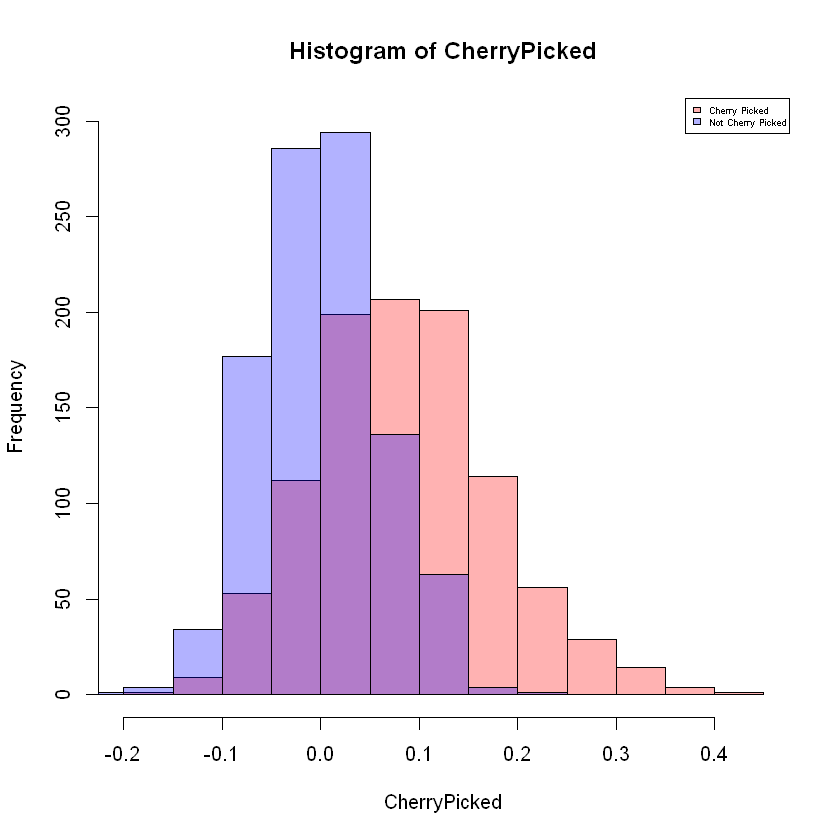

In [9]:
hist(CherryPicked, col = alpha('red' ,.3), ylim = c(0,300))
hist(NotCherryPicked, add = T,col=alpha('blue',.3))+
  legend('topright', legend = c("Cherry Picked", "Not Cherry Picked"), fill = c(alpha('red',.3),alpha('blue',.3)), col = c('red', 'blue'), cex = .45)
#The non cherry picked data, represented by the blue, is a unimodal, narrowly distributed graph with a mean around 0. 
#The cherry picked data, represented by the red, is more widely distributed. It’s slightly right skewed with a mean around 0.8.